In [9]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
#wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
#plot_cloud(wordcloud)

In [1]:
# Import package
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [2]:
import numpy as np
np.set_printoptions(threshold=np. inf)
import pandas as pd
data=pd.read_csv('gold-dataset-sinha-khandait-NEWS-SOURCE-MERGED-VERSION.csv')


import nltk
stopwords = nltk.corpus.stopwords.words('english')

import string
import re

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [3]:
def clean_text(txt):
    txt = "".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\W+',txt)
    txt = [ps.stem(word) for word in tokens if word not in stopwords]
    return txt

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer( analyzer=clean_text, min_df = 2)
#max_features=14301
X = tfidf_vect.fit_transform(data['document'])
feature_names = tfidf_vect.get_feature_names()
dense = X.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df

,,005,01,010,011,014,015,016,018,019,...,yet,yield,york,yoy,yr,yuan,yy,zinc,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.T.sum(axis=1)

        20.243849
005      1.303683
01      65.160788
010      1.606078
011      1.441968
          ...    
yuan     3.723203
yy       1.301352
zinc     4.485412
zone     5.269926
zoom     6.454518
Length: 3203, dtype: float64

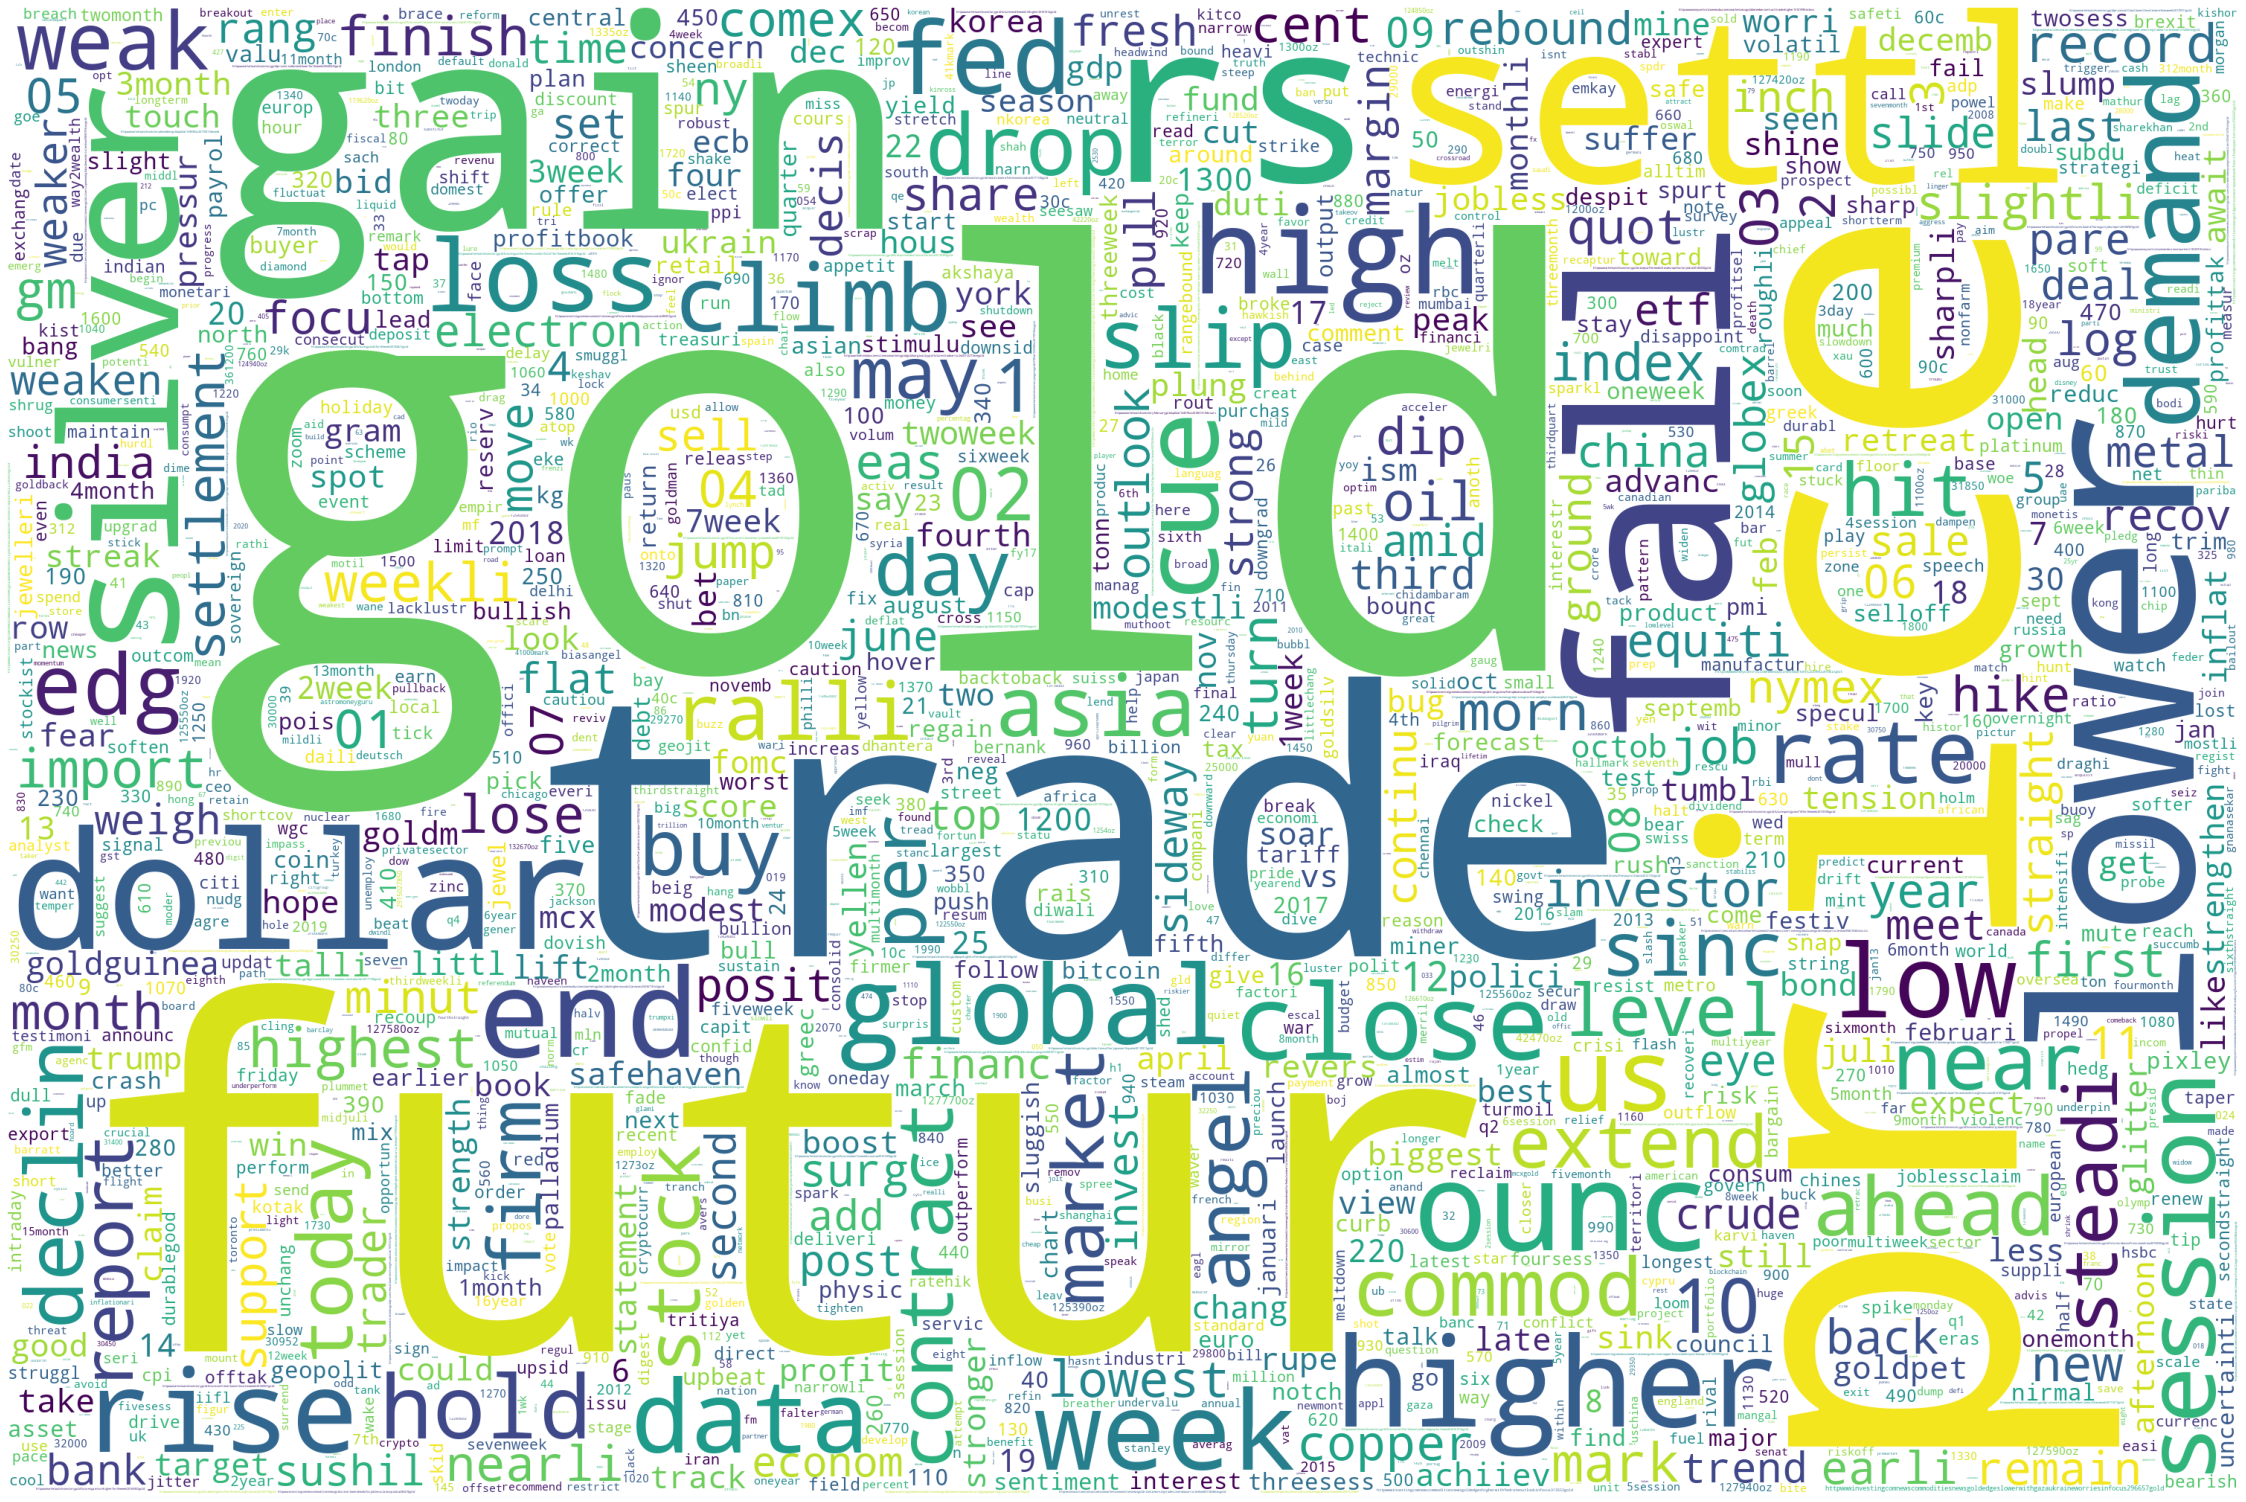

In [19]:
Cloud = WordCloud(background_color="white", max_words=3000, width= 3000, height = 2000).generate_from_frequencies(df.T.sum(axis=1))
plot_cloud(Cloud)